In [1]:
!pip -q install scanpy anndata h5py pandas matplotlib numpy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.1/284.1 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 29.7 MB/s eta 0:00:00


In [2]:
import os
import warnings
import pandas as pd
import anndata as ad
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt



In [3]:
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)


In [4]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [5]:
import os

os.listdir("/content/drive/MyDrive/")


['AM.zip',
 'AM_electrostatic.png',
 'GK_electrostatic.png',
 'Stsndard_movie.gif',
 'gk_movie.gif',
 'Standard_electrostatic.png',
 'Standard.mp4',
 'Decomposition_NORMAL_GB_Delta_TDC_std.csv',
 'Decomposition_NORMAL_GB_Delta_SDC_std.csv',
 'Decomposition_NORMAL_GB_Delta_TDC_GK.csv',
 'Decomposition_NORMAL_GB_Delta_SDC_GK.csv',
 'Decomposition_Normal_GB_Delta_GK.csv',
 'Decomposition_Normal_GB_Delta_AM.csv',
 'Decomposition_NORMAL_GB_Delta_TDC_AM.csv',
 'Decomposition_NORMAL_GB_Delta_SDC_AM.csv',
 'Decomposition_Normal_GB_Delta_sTD.csv',
 'dccm_std.pdf',
 'dccm_gk.pdf',
 'dccm_AM.pdf',
 'Vaccine.zip',
 'md_0_10_prev.cpt',
 '33189.zip',
 '18503.zip',
 'standard.zip',
 'Apo_7af.zip',
 'Colab Notebooks',
 'FEL_sham300.xpm',
 'Gromacs Codes',
 'GSE183276_umap_coordinates.csv',
 'GSE183276_colab_plots',
 'Adult_Human_Kidney.pkl',
 'UMAP_majority_voting_clean.png',
 'UMAP_majority_voting_clean_smallpoints.png',
 'GSE183276',
 'Gramicidin.zip',
 'output03_GSE279086_seurat_pca_umap.h5ad',
 'o

In [7]:
import anndata as ad
import os

output_dir = "/content/drive/MyDrive/"   # because files are directly inside MyDrive

raw_path = os.path.join(output_dir, "GSE279086_seurat_pca_umap.h5ad")
harmony_path = os.path.join(output_dir, "GSE279086_harmony_corrected.h5ad")

print(raw_path)
print(harmony_path)

GSE_raw_adata = ad.read_h5ad(raw_path)
print(GSE279086_raw_adata)

GSE183276_harmony_adata = ad.read_h5ad(harmony_path)
print(GSE183276_harmony_adata)


/content/drive/MyDrive/output03_GSE279086_seurat_pca_umap.h5ad
/content/drive/MyDrive/output04_GSE279086_harmony_corrected.h5ad
AnnData object with n_obs × n_vars = 5405 × 16442
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt', 'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters', 'ident', 'majority_voting', 'mahal_dist_nCount'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP', 'X_PCA', 'X_UMAP'
    layers: 'logcounts'
AnnData object with n_obs × n_vars = 5405 × 16442
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt', 'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters', 'ident', 'majority_voting', 'mahal_dist_nCount'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP', 'X_PCA', 'X_UMAP'
    layers: 'logcounts'


In [27]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Make output folder in Drive
plot_dir = "/content/drive/MyDrive/GSE_colab_plots"
os.makedirs(plot_dir, exist_ok=True)

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=120)


In [11]:
print(GSE279086_harmony_adata.obsm.keys())
print(GSE279086_harmony_adata.obs.columns)


KeysView(AxisArrays with keys: HARMONY, PCA, UMAP, X_PCA, X_UMAP)
Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp',
       'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt',
       'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters',
       'ident', 'majority_voting', 'mahal_dist_nCount'],
      dtype='object')


In [12]:
GSE279086_harmony_adata.obs["seurat_clusters"].value_counts().head()


,count
seurat_clusters,
0,869
1,552
2,546
3,543
4,508


In [13]:
GSE279086_raw_adata = ad.read_h5ad(raw_path)
print(GSE279086_raw_adata)

GSE279086_harmony_adata = ad.read_h5ad(harmony_path)
print(GSE279086_harmony_adata)


AnnData object with n_obs × n_vars = 5405 × 16442
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt', 'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters', 'ident', 'majority_voting', 'mahal_dist_nCount'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP', 'X_PCA', 'X_UMAP'
    layers: 'logcounts'
AnnData object with n_obs × n_vars = 5405 × 16442
    obs: 'orig.ident', 'nCount_originalexp', 'nFeature_originalexp', 'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt', 'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters', 'ident', 'majority_voting', 'mahal_dist_nCount'
    uns: 'X_name'
    obsm: 'HARMONY', 'PCA', 'UMAP', 'X_PCA', 'X_UMAP'
    layers: 'logcounts'


In [15]:
print(GSE279086_harmony_adata.obs.columns)


Index(['orig.ident', 'nCount_originalexp', 'nFeature_originalexp',
       'nCount_RNA', 'nFeature_RNA', 'Condition', 'percent.rb', 'percent.mt',
       'Sample', 'pca_clusters', 'harmony_nn_res.0.8', 'seurat_clusters',
       'ident', 'majority_voting', 'mahal_dist_nCount'],
      dtype='object')


In [18]:
# If UMAP exists as "UMAP", convert it to scanpy expected key
if "UMAP" in GSE279086_harmony_adata.obsm.keys():
    GSE279086_harmony_adata.obsm["X_umap"] = GSE279086_harmony_adata.obsm["UMAP"]
    if isinstance(GSE279086_harmony_adata.obsm["X_umap"], pd.DataFrame):
        GSE279086_harmony_adata.obsm["X_umap"] = GSE279086_harmony_adata.obsm["X_umap"].values

# If PCA exists as "PCA"
if "PCA" in GSE279086_harmony_adata.obsm.keys():
    GSE279086_harmony_adata.obsm["X_pca"] = GSE279086_harmony_adata.obsm["PCA"]
    if isinstance(GSE279086_harmony_adata.obsm["X_pca"], pd.DataFrame):
        GSE279086_harmony_adata.obsm["X_pca"] = GSE279086_harmony_adata.obsm["X_pca"].values

print(GSE279086_harmony_adata.obsm.keys())

KeysView(AxisArrays with keys: HARMONY, PCA, UMAP, X_PCA, X_UMAP, X_umap, X_pca)


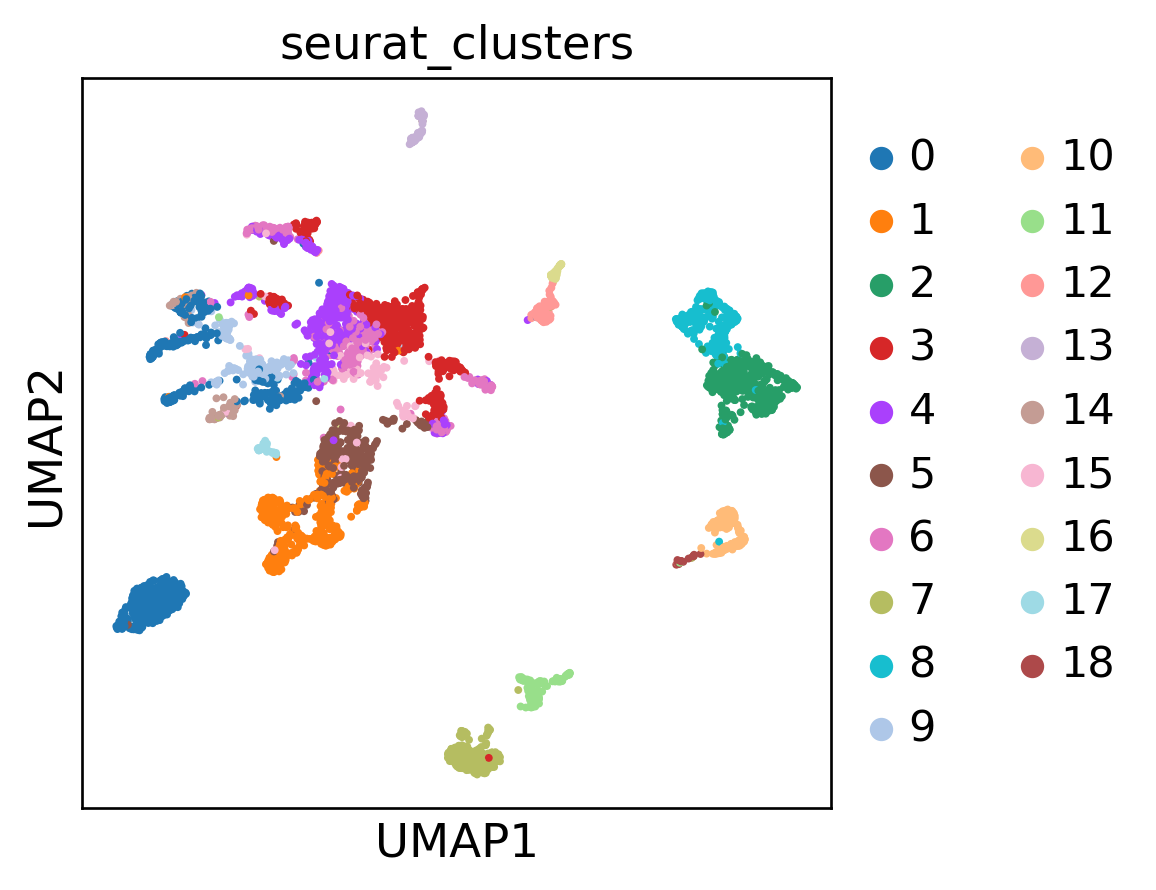

In [35]:
if isinstance(GSE279086_harmony_adata.obsm["X_umap"], pd.DataFrame):
    GSE279086_harmony_adata.obsm["X_umap"] = GSE279086_harmony_adata.obsm["X_umap"].values

sc.pl.umap(GSE279086_harmony_adata, color="seurat_clusters", show=False)
plt.savefig(os.path.join(plot_dir, "UMAP_seurat_clusters.png"), dpi=300, bbox_inches="tight")
plt.show()

In [19]:
GSE279086_harmony_adata.X = GSE279086_harmony_adata.layers["logcounts"].copy()


In [20]:
base_dir = output_dir # Assuming model is in the output directory
model_path = os.path.join(base_dir, "Adult_Human_Kidney.pkl")
print(model_path)

/content/drive/MyDrive/Adult_Human_Kidney.pkl


In [21]:
!pip install -q celltypist
import celltypist


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.1/45.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 53.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 95.4 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/celltypist/classifier.py:11: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('scanpy')` instead
  from scanpy import __version__ as scv


In [22]:
GSE279086_harmony_adata.X = GSE183276_harmony_adata.layers["logcounts"].copy()


In [23]:
model_path = "/content/drive/MyDrive/Adult_Human_Kidney.pkl"


In [24]:
ct_pred = celltypist.annotate(
    GSE279086_harmony_adata,
    model=model_path,
    majority_voting=True
)


In [25]:
GSE279086_harmony_adata.obs["majority_voting"] = (
    ct_pred.predicted_labels["majority_voting"].astype(str)
)

print(GSE279086_harmony_adata.obs["majority_voting"].value_counts().head())


majority_voting
aTAL      885
PC        635
EC-PTC    534
aPT       508
PT        441
Name: count, dtype: int64


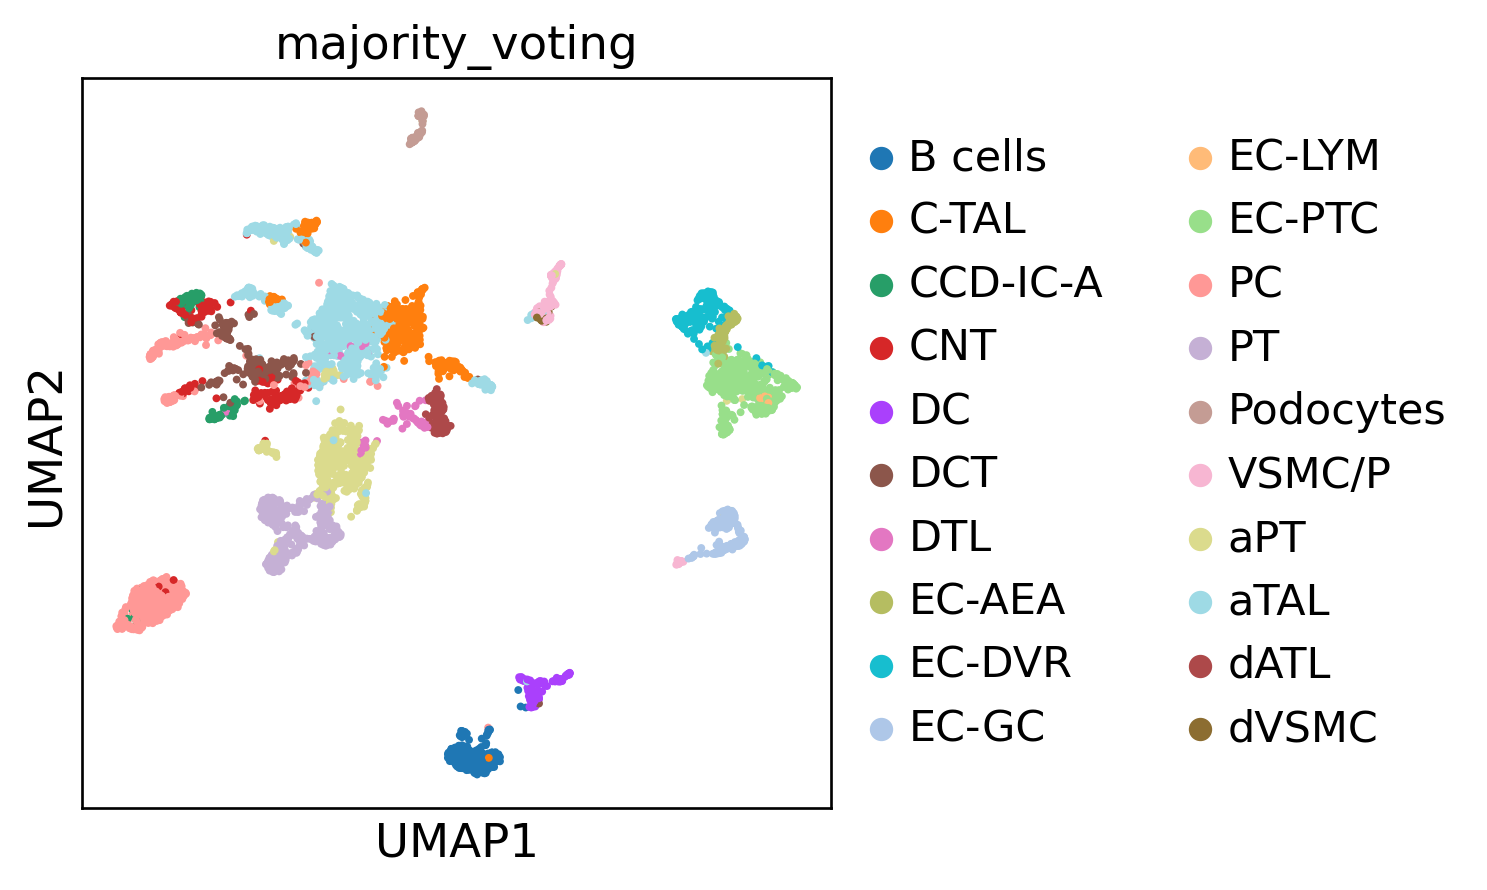

In [28]:
# Re-create X_umap if it was lost by previous operations
if "UMAP" in GSE279086_harmony_adata.obsm.keys():
    GSE183276_harmony_adata.obsm["X_umap"] = GSE183276_harmony_adata.obsm["UMAP"]
    if isinstance(GSE279086_harmony_adata.obsm["X_umap"], pd.DataFrame):
        GSE279086_harmony_adata.obsm["X_umap"] = GSE279086_harmony_adata.obsm["X_umap"].values

sc.pl.umap(GSE279086_harmony_adata, color="majority_voting", legend_loc="right margin", show=False)
plt.savefig(os.path.join(plot_dir, "UMAP_celltypist_majority_voting.png"), dpi=300, bbox_inches="tight")
plt.show()

In [29]:
base_dir = output_dir # Ensuring base_dir is defined
final_path = os.path.join(base_dir, "output", "GSE279086_celltypist.h5ad")
os.makedirs(os.path.dirname(final_path), exist_ok=True) # Create the directory if it doesn't exist
GSE183276_harmony_adata.write(final_path)
print("Saved:", final_path)

Saved: /content/drive/MyDrive/output/GSE279086_celltypist.h5ad


In [30]:
import scanpy as sc
import anndata as ad
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# ---- paths in Google Drive ----
h5ad_path = "/content/drive/MyDrive/GSE279086_harmony_corrected.h5ad"
umap_csv_path = "/content/drive/MyDrive/GSE279086_umap_coordinates.csv"

# ---- load adata ----
adata = sc.read_h5ad(h5ad_path)

# ---- load UMAP coordinates ----
umap_df = pd.read_csv(umap_csv_path, index_col=0)

print("UMAP CSV shape:", umap_df.shape)
print("AnnData cells:", adata.n_obs)

# ---- IMPORTANT: match order using cell barcodes ----
umap_df = umap_df.loc[adata.obs_names]

# ---- inject into AnnData ----
adata.obsm["X_umap"] = umap_df.values

print("Injected UMAP:", adata.obsm["X_umap"].shape)


UMAP CSV shape: (5405, 2)
AnnData cells: 5405
Injected UMAP: (5405, 2)


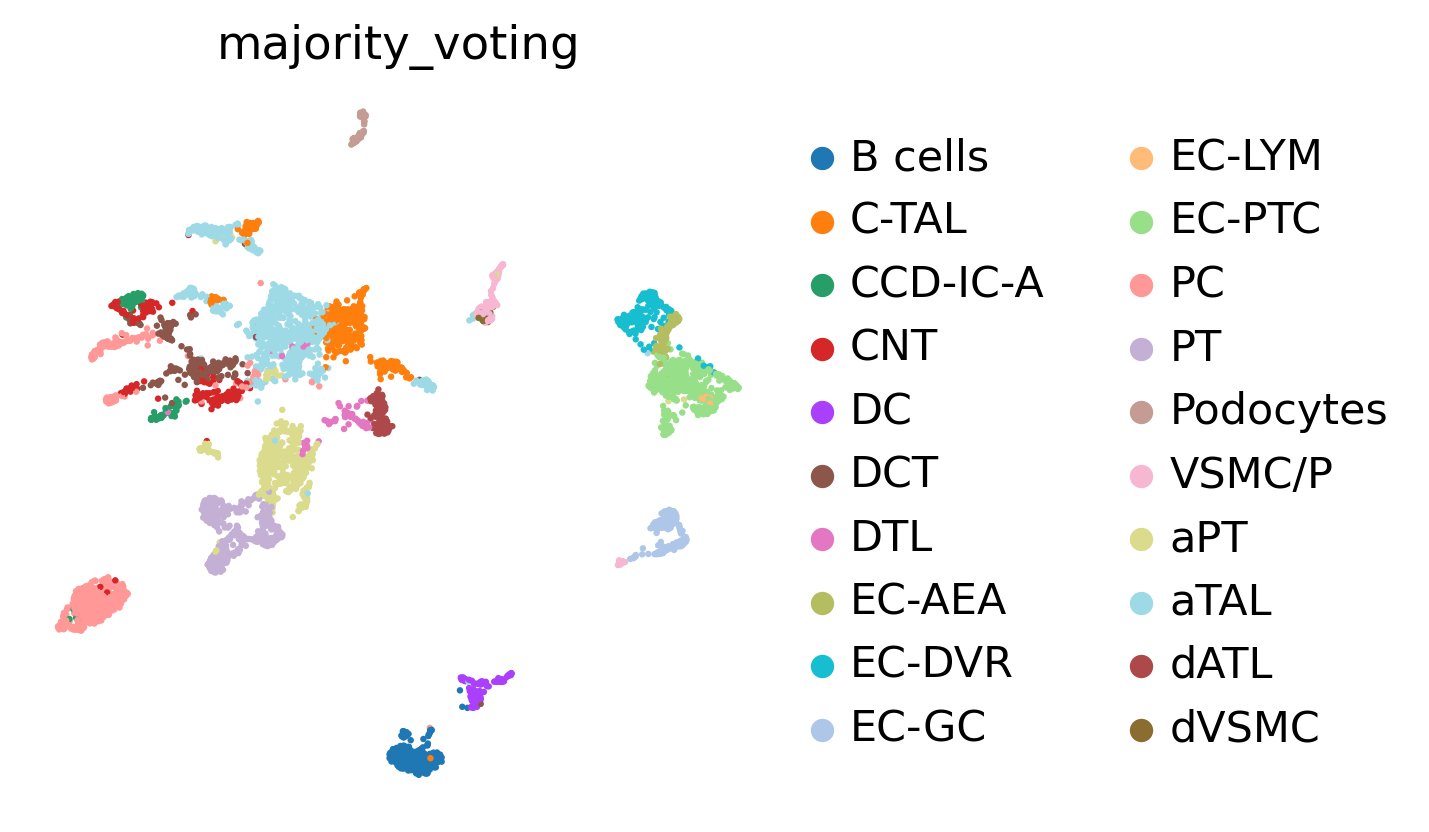

In [31]:
sc.pl.umap(
    GSE279086_harmony_adata, # Changed from 'adata' to 'GSE279086_harmony_adata'
    color="majority_voting",
    legend_loc="right margin",
    frameon=False,
    size=15,
    show=False
)

plt.savefig("/content/drive/MyDrive/UMAP_majority_voting_clean.png",
            dpi=300, bbox_inches="tight")
plt.show()

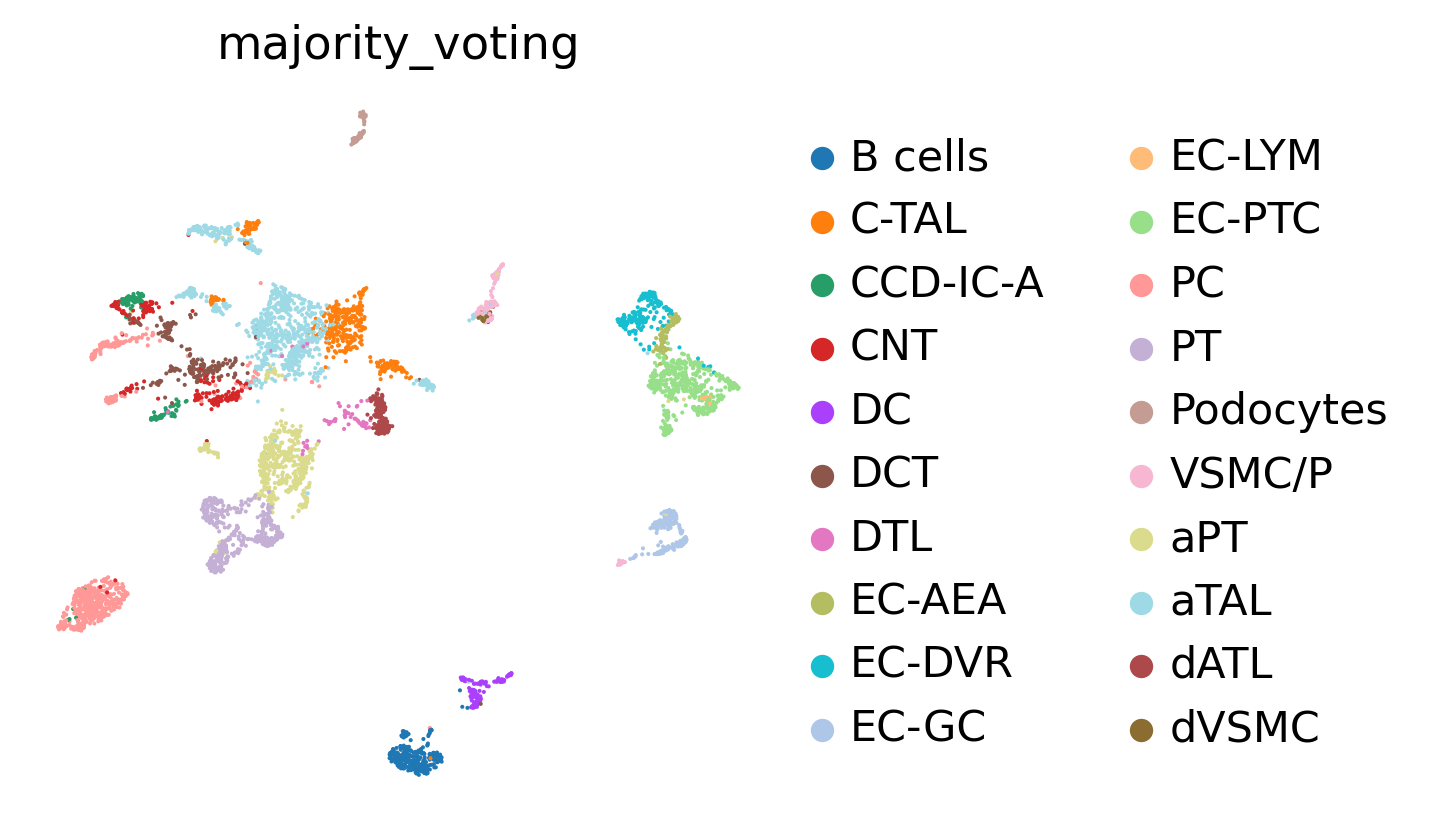

In [32]:
sc.pl.umap(
    GSE279086_harmony_adata, # Changed from 'adata' to 'GSE279086_harmony_adata'
    color="majority_voting",
    legend_loc="right margin",
    frameon=False,
    size=6,            # smaller dots
    show=False
)

plt.savefig("/content/drive/MyDrive/UMAP_majority_voting_clean_smallpoints.png",
            dpi=300, bbox_inches="tight")
plt.show()

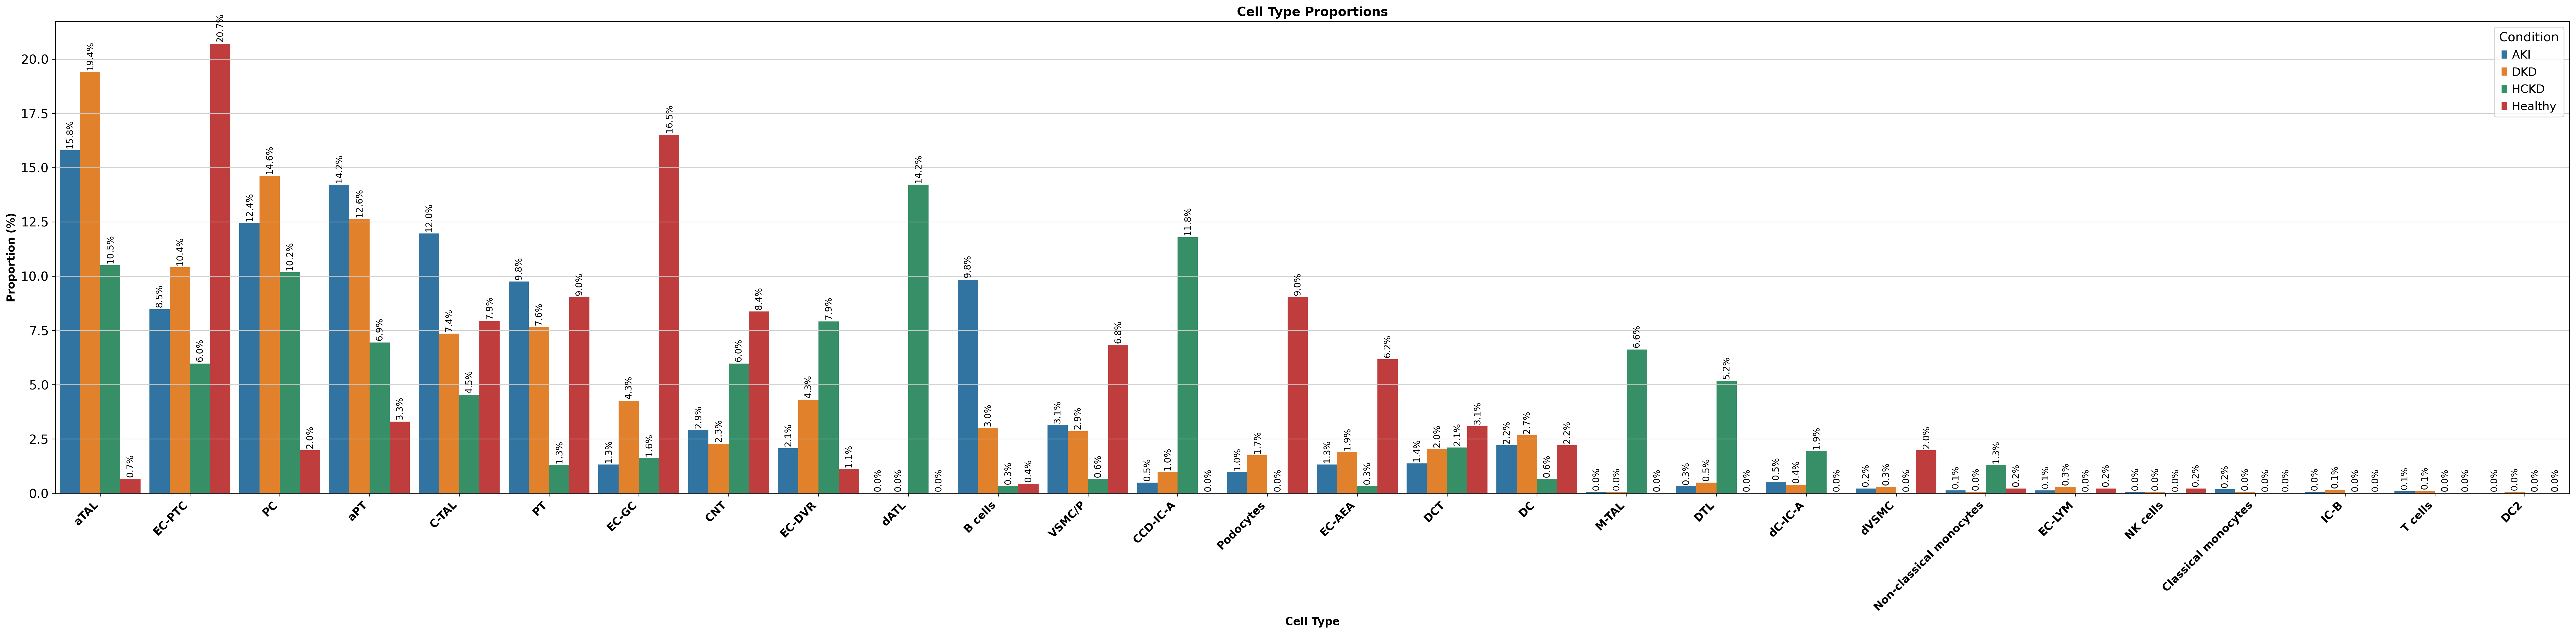

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Count cells per cell type per condition
n_cells_condition = (
    GSE183276_harmony_adata.obs # Changed from GSE279086_raw_adata.obs
    .groupby(["Condition", "majority_voting"])
    .size()
    .reset_index(name="count")
)

# Step 2: Calculate proportions per condition
n_cells_condition["total"] = n_cells_condition.groupby("Condition")["count"].transform("sum")
n_cells_condition["proportion"] = (n_cells_condition["count"] / n_cells_condition["total"]) * 100

# Step 3: Order cell types by average proportion
avg_proportions = (
    n_cells_condition
    .groupby("majority_voting")["proportion"]
    .mean()
    .sort_values(ascending=False)
)
ordered_celltypes = avg_proportions.index.tolist()

# Step 4: Plot
plt.figure(figsize=(40, 10));
ax = sns.barplot(
    data=n_cells_condition,
    x="majority_voting",
    y="proportion",
    hue="Condition",
    order=ordered_celltypes,
    dodge=True,
    width=0.9
);

# Step 5: Add labels
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="edge",
                 padding=2, fontsize=10, rotation=90)

plt.xticks(rotation=45, ha="right", fontsize=12, fontweight="bold")
plt.ylabel("Proportion (%)", fontsize=12, fontweight="bold")
plt.xlabel("Cell Type", fontsize=12, fontweight="bold")
plt.title("Cell Type Proportions", fontsize=14, fontweight="bold")
plt.tight_layout()

plt.savefig(os.path.join(plot_dir, "Cellproportions_barplot.png"),
            dpi=300, bbox_inches="tight")
plt.show()

n_cells_condition.to_csv("Cellproportions_279086.csv", index=False)

In [ ]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import os

plotDir = "/content/drive/MyDrive/GSE183276/demo/plots/celltypist_plots"
os.makedirs(plotDir, exist_ok=True)

# 1) Remove Classical monocytes
excluded_prefixes = ["Classical monocytes"]
# Changed from GSE183276_raw_adata to GSE183276_harmony_adata
mask = ~GSE183276_harmony_adata.obs["majority_voting"].astype(str).str.startswith(tuple(excluded_prefixes))
adata_to_plot = GSE183276_harmony_adata[mask].copy()

# 2) Get genes from unique markers
# NOTE: `unique_markers` variable is not defined in the current kernel state.
# If you intend to use specific marker genes, please define `unique_markers` first.
# For now, I'm commenting out the lines that use `unique_markers` to allow execution
# genes_to_plot = unique_markers["names"].tolist()
# genes_to_plot = [g for g in genes_to_plot if g in adata_to_plot.var_names]

# Placeholder for genes_to_plot if unique_markers is not available or to avoid further errors
# If you have a specific list of marker genes, you should define unique_markers or genes_to_plot here.
# For demonstration, let's use some example genes if adata_to_plot.var_names is not empty
if len(adata_to_plot.var_names) > 0:
    genes_to_plot = adata_to_plot.var_names[:min(50, len(adata_to_plot.var_names))].tolist() # Take up to 50 genes as an example
else:
    genes_to_plot = [] # Handle case where there are no genes

print("Genes before filtering:", len(genes_to_plot))

# Only proceed if there are genes to plot
if len(genes_to_plot) > 0:
    # 3) Expression matrix for those genes
    X = adata_to_plot[:, genes_to_plot].X
    if hasattr(X, "toarray"):
        X = X.toarray()

    expr_df = pd.DataFrame(
        X,
        index=adata_to_plot.obs["majority_voting"].astype(str).values,
        columns=genes_to_plot
    )

    # 4) Sum per group
    expr_per_group = expr_df.groupby(expr_df.index).sum()

    # 5) Keep genes with max >= 30
    genes_filtered = expr_per_group.columns[(expr_per_group.max(axis=0) >= 30)].tolist()
    expr_per_group = expr_per_group[genes_filtered]

    # 6) Keep groups with enough signal
    valid_groups = expr_per_group.index[(expr_per_group.sum(axis=1) > 20)].tolist()
    adata_to_plot = adata_to_plot[adata_to_plot.obs["majority_voting"].astype(str).isin(valid_groups)].copy()

    print("Genes after filtering:", len(genes_filtered))
    print("Groups after filtering:", len(valid_groups))

    # 7) Dotplot (return_fig=True avoids weird printing)
    if len(genes_filtered) > 0 and len(valid_groups) > 0:
        dp = sc.pl.dotplot(
            adata_to_plot,
            var_names=genes_filtered,
            groupby="majority_voting",
            standard_scale="var",
            dendrogram=False,
            figsize=(20, 20),
            show=False,
            return_fig=True
        )

        # Using the existing plot_dir variable for consistency
        outpath = os.path.join(plot_dir, "Cluster_Markergenes.png") # Changed plotDir to plot_dir
        dp.savefig(outpath, dpi=300, bbox_inches="tight")
        plt.close()

        print("Saved:", outpath)
    else:
        print("No genes or groups left after filtering, skipping dotplot.")
else:
    print("No genes to plot after initial selection. Skipping analysis and dotplot.")

Genes before filtering: 50
Genes after filtering: 44
Groups after filtering: 27
Saved: /content/drive/MyDrive/GSE183276_colab_plots/Cluster_Markergenes.png


In [36]:
out_h5ad = "/content/drive/MyDrive/output/GSE279086_raw_adata.h5ad" # Changed to a filename
os.makedirs(os.path.dirname(out_h5ad), exist_ok=True) # Ensure directory exists
GSE183276_raw_adata.write(out_h5ad)
print("Saved:", out_h5ad)

Saved: /content/drive/MyDrive/output/GSE279086_raw_adata.h5ad
